# Exercício de Mistura Gaussiana

Você deve aplicar os conceitos e o algoritmo em dois exemplos, de forma similar ao exercício de MeanSHift. Uma aplicação com valores fictícios e outro com valores reais

## Exemplo Prático

Neste exemplo, iremos criar dados imaginários que serão utilizados para realização da clusterização. Para isso, utilize o segmento de código abaixo e a Variável **X**

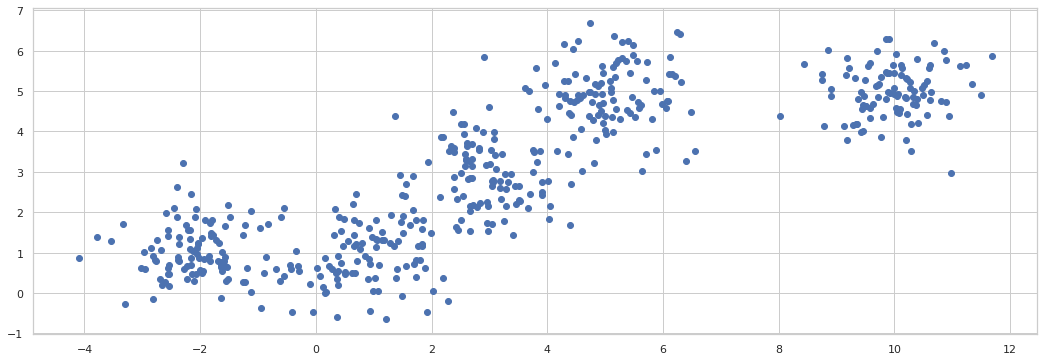

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
position = [[3,3,1],[1,1,1],[5,5,9], [10,5,1], [-2,1,0]]
X,_=make_blobs(n_samples=500,centers=position,cluster_std=0.70)

plt.scatter(X[:,0],X[:,1])
plt.show()

### 0 - Importação das bibliotecas

In [ ]:
%matplotlib inline
import numpy as np
from sklearn.mixture import GaussianMixture 
import seaborn as sns
import pandas as pd

### 1 - Visualização dos dados

In [ ]:
# Como podemos ver abaixo os nossos dados estão em 3 dimensões, para facilitar vamos
# analisar somente em 2 dimensões (Coluna 0 e 1)
X

array([[-0.61267666,  0.30704409,  1.58901715],
       [11.14102433,  5.61854046,  0.27796385],
       [-2.00130924,  0.57262105,  0.9538572 ],
       ...,
       [ 2.16478288,  3.87454049,  0.45031375],
       [-2.18035933,  1.3357829 ,  0.01534801],
       [11.4964874 ,  4.89489891,  1.26467205]])

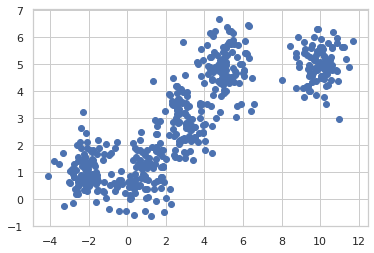

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### 2 - Aplicação básica do Gaussian Mixture

In [ ]:
GM = GaussianMixture(max_iter=10*8, n_components=4)
GM.fit(X)

cluster_center = GM.means_
print("Número de clusteres: ",len(cluster_center))
print(cluster_center)


Número de clusteres:  4
[[ 1.98048544  1.95515368  1.03052792]
 [ 9.95707815  4.98147584  0.89795366]
 [ 5.07987367  4.96724426  8.92673093]
 [-2.00890392  1.02877795  0.01220371]]


### 3 - Visualização dos resultados

De forma similar ao KMeans, o método de Mistura Gaussiana utiliza um informação prévia de quantos clusterings o conjunto de dados possa ter. Neste caso, faça uma análise de como ficaria os dados acima para grupos de clusterings de 2 a 6 agrupamentos e avalie qual seria o melhor deles.

In [ ]:
df = pd.DataFrame(X)
for i in range(2,7):
  GM = GaussianMixture(max_iter=10*8, n_components=i)
  GM.fit(X)
  df[str(i) + '_cl'] = GM.predict(X)
df.head()

,0,1,2,2_cl,3_cl,4_cl,5_cl,6_cl
0,-0.612677,0.307044,1.589017,0,0,0,0,4
1,11.141024,5.618540,0.277964,0,2,3,2,3
2,-2.001309,0.572621,0.953857,0,0,2,3,5
3,9.686170,5.136702,1.533493,0,2,3,2,3
4,2.510449,2.984077,1.268294,0,0,0,4,2


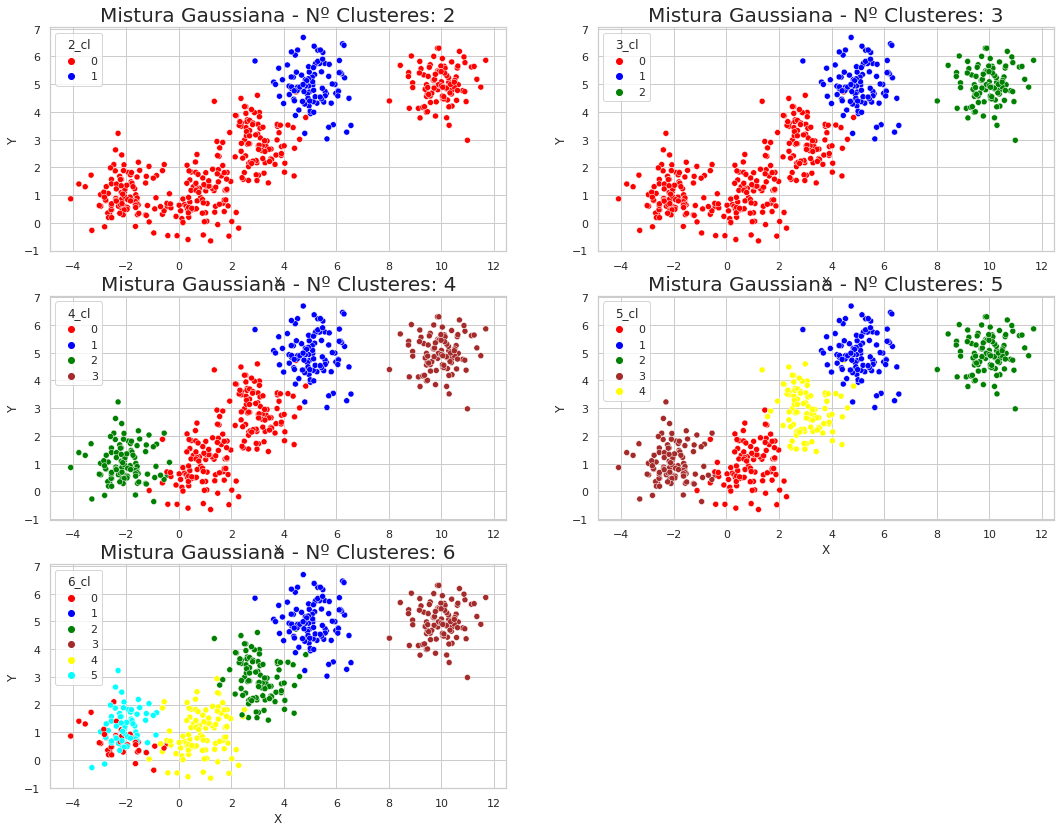

In [ ]:
# Plotagem das Clusterização
plt.rcParams['figure.figsize'] = (18, 14) # Formata o comprimento e altura total do plot
color = ['red','blue','green','brown','yellow','cyan', 'magenta']

# Gaussian Mixture:
for i in range(1,6):
  plt.subplot(3, 2, i)
  sns.set(style = 'whitegrid')
  sns.scatterplot(x=df[0], y=df[1],
                hue=str(i+1)+'_cl', data=df, palette=color[:i+1])
  plt.title('Mistura Gaussiana - Nº Clusteres: {}'.format(i+1), fontsize = 20)
  plt.xlabel('X')
  plt.ylabel('Y')


## Exemplo real - Clusterização de Massa Corporal

Utilizando o dataset abaixo, o mesmo utilizado no Exercício de Mean Shift, que contém informação de Altura e Peso de diversos indivíduos, iremos analisar os a diferença do MeanShift e do KMeans nesse processo.


Neste caso, iremos realizar uma abordagem diferente, porém ainda assim comparando os resultados do KMeans, MeanShift e GaussianMixture.



### 0 - Importação da Biblioteca

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn.mixture import GaussianMixture 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
%matplotlib inline

### 1 - Análise Inicial dos dados

In [ ]:
# Em problemas de clusterização, não temos rótulos pré-associados aos dados, portanto, utiliza-se 
# algoritmos de classificação que cria uma associação a estes róstulos, correlacionando as caracte
# rísticas e agrupando as amsotras.

'''Sobre o dataset: Vamos classificar os tipos de massa corporal, utilizando as alturas e pesos.'''
# load do dataset

data = pd.read_csv('/content/Clustering_gmm.csv')
data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


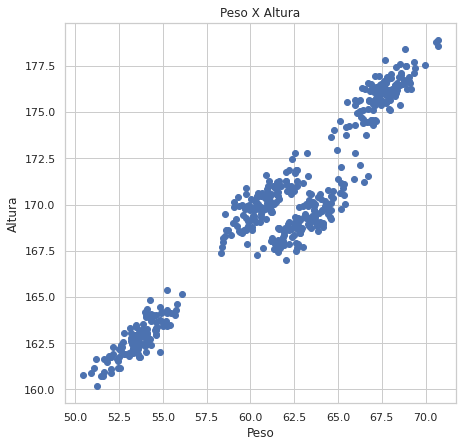

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter("Weight","Height",data=data)
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.title('Peso X Altura')
plt.show()

### 2 - Descubrindo o número ideal de clusterings: Método Elbow e Silhueta (silhouette)

Para lhe auxiliar na consulta:
Elbow: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
Silhouette:  https://www.kdnuggets.com/2019/10/clustering-metrics-better-elbow-method.html

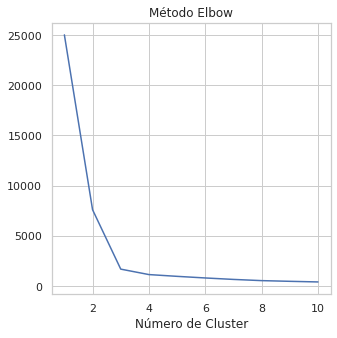

In [ ]:
# Supondo que não soubéssemos quantos clusteres poderíamos fazer com esse data, podemos utilizar o
# método do cotevelo no K-Média.
# Para maior detalhamento: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

plt.figure(figsize=(5,5))
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 11), elbow)
plt.title('Método Elbow')
plt.xlabel('Número de Cluster')



plt.show()

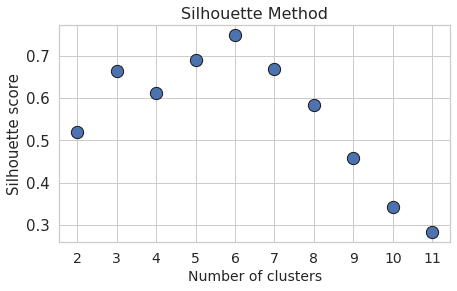

In [ ]:
# Nesse exemplo, vamos analisar um outro método para verificação do número de clusteres do nosso
# conjunto de dados, o método da silhueta e o BIC porém, devido a grande variedade de dados, é preciso
# aprendermos algumas coisas novas.
# Fonte: https://www.kdnuggets.com/2019/10/clustering-metrics-better-elbow-method.html
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

alvo = df
max = 12
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
gm_bic= []
gm_score=[]
for i in range(2,max):
    km = KMeans(n_clusters=i, random_state=0).fit(alvo)
    preds = km.predict(alvo)
    
    km_scores.append(-km.score(alvo))
    
    silhouette = silhouette_score(alvo,preds)
    km_silhouette.append(silhouette)

# Plotagem do método da Silhouette (Silhueta)
plt.figure(figsize=(7,4))
plt.title("Silhouette Method",fontsize=16)
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,max)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


### 3 - Clusterização utilizando o Kmeans

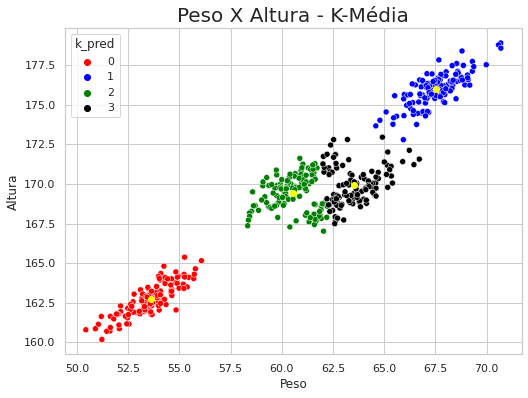

In [ ]:
# Vamos resolver esse exemplo, utilizando e comparando dois métodos
# Treinando o modelo de K-Média
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmedia = kmeans.fit(data)

# Testando o modelo
k_pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['k_pred'] = k_pred
save = k_pred
frame.head()

# Plotagem das Clusterização
plt.rcParams['figure.figsize'] = (18, 6) # Formata o comprimento e altura total do plot
color = ['red','blue','green','black']

# K - Média:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.scatterplot(x="Weight", y="Height",
                hue="k_pred", data=data, palette=color)


for i in range(0,len(kmedia.cluster_centers_)):
  X = kmedia.cluster_centers_.tolist()[i][0]
  Y = kmedia.cluster_centers_.tolist()[i][1]
  plt.scatter(X,Y,color='Yellow')


plt.title('Peso X Altura - K-Média', fontsize = 20)
plt.xlabel('Peso')
plt.ylabel('Altura')

plt.show()



### 4 - Clusterização utilizando o MeanShift

Numero de Clusteres: 3


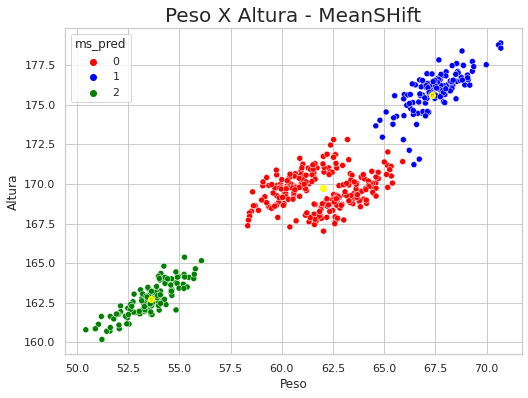

In [ ]:
# Vamos resolver esse exemplo, utilizando e comparando dois métodos
# Treinando o modelo de K-Média
ms = MeanShift(bin_seeding=False,max_iter=-1)
ms.fit(data[['Weight','Height']])
labels = ms.labels_
print("Numero de Clusteres: {}".format(len(ms.cluster_centers_)))

# Testando o modelo
ms_pred = ms.predict(data[['Weight','Height']])
frame = pd.DataFrame(data[['Weight','Height']])
data['ms_pred'] = ms_pred
save = ms_pred
frame.head()

# Plotagem das Clusterização
plt.rcParams['figure.figsize'] = (18, 6) # Formata o comprimento e altura total do plot
color = ['red','blue','green','black']

# Meanshift:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.scatterplot(x="Weight", y="Height",
                hue="ms_pred", data=data, palette=['red','blue','green'])


cluster_centers = ms.cluster_centers_
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker=".",color='yellow', s=20, linewidths = 5, zorder=10)


plt.title('Peso X Altura - MeanSHift', fontsize = 20)
plt.xlabel('Peso')
plt.ylabel('Altura')

plt.show()

### 5 - Clusterização Gaussiana

Numero de Clusteres: 4


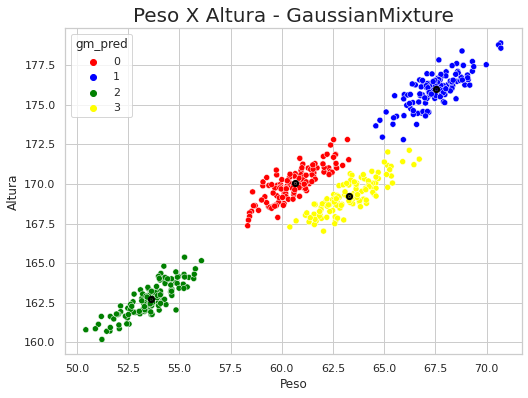

In [ ]:
GM = GaussianMixture(max_iter=10*8, n_components=4)
GM.fit(data[['Weight','Height']])
labels = GM.n_components
print("Numero de Clusteres: {}".format(labels))

# Testando o modelo
data['gm_pred'] = GM.predict(data[['Weight','Height']])


# Plotagem das Clusterização
plt.rcParams['figure.figsize'] = (18, 6) # Formata o comprimento e altura total do plot
color = ['red','blue','green','black']

# Meanshift:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.scatterplot(x="Weight", y="Height",
                hue="gm_pred", data=data, palette=['red','blue','green','yellow'])


cluster_centers = GM.means_
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker=".",color='black', s=20, linewidths = 5, zorder=10)


plt.title('Peso X Altura - GaussianMixture', fontsize = 20)
plt.xlabel('Peso')
plt.ylabel('Altura')

plt.show()

In [ ]:
data.head()

,Weight,Height,k_pred,ms_pred,gm_pred
0,67.062924,176.086355,1,1,1
1,68.804094,178.388669,1,1,1
2,60.930863,170.284496,2,0,0
3,59.733843,168.691992,2,0,0
4,65.431230,173.763679,1,1,1


### 5 - Comparação visual dos dois métodos

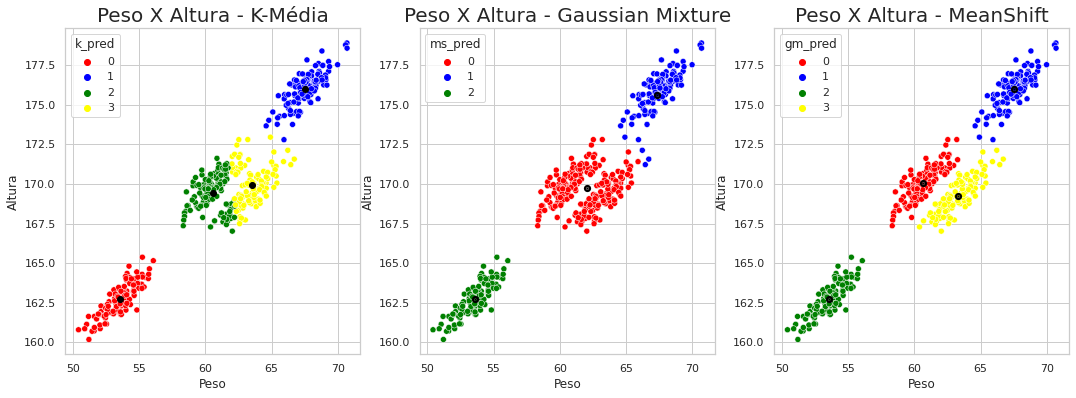

In [ ]:
# Plotagem das Clusterização
plt.rcParams['figure.figsize'] = (18, 6) # Formata o comprimento e altura total do plot
color = ['red','blue','green','yellow']

# K - Média:
plt.subplot(1, 3, 1)
sns.set(style = 'whitegrid')
sns.scatterplot(x="Weight", y="Height",
                hue="k_pred", data=data, palette=color)

for i in range(0,len(kmedia.cluster_centers_)):
  X = kmedia.cluster_centers_.tolist()[i][0]
  Y = kmedia.cluster_centers_.tolist()[i][1]
  plt.scatter(X,Y,color='Black')

plt.title('Peso X Altura - K-Média', fontsize = 20)
plt.xlabel('Peso')
plt.ylabel('Altura')


# Mistura Gaussiana:
plt.subplot(1, 3, 2)
sns.set(style = 'whitegrid')
sns.scatterplot(x="Weight", y="Height",
                hue="ms_pred", data=data, palette=['Red','Blue','Green'])
cluster_centers = ms.cluster_centers_
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker=".",color='Black', s=20, linewidths = 5, zorder=10)

plt.title('Peso X Altura - Gaussian Mixture', fontsize = 20)
plt.xlabel('Peso')
plt.ylabel('Altura')

# Mistura Gaussiana:
plt.subplot(1, 3, 3)
sns.set(style = 'whitegrid')
sns.scatterplot(x="Weight", y="Height",
                hue="gm_pred", data=data, palette=['Red','Blue','Green','Yellow'])
cluster_centers = GM.means_
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker=".",color='black', s=20, linewidths = 5, zorder=10)

plt.title('Peso X Altura - MeanShift', fontsize = 20)
plt.xlabel('Peso')
plt.ylabel('Altura')

plt.show()